In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Project/Data/customer_churn_dataset-training-master.csv')

In [8]:
dataset.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,Subscription Type_Encoded
0,30.0,39.0,14.0,5.0,18.0,Standard,932.0,17.0,1.0,1,0,1,0,0,2.0
1,65.0,49.0,1.0,10.0,8.0,Basic,557.0,6.0,1.0,1,0,0,1,0,1.0
2,55.0,14.0,4.0,6.0,18.0,Basic,185.0,3.0,1.0,1,0,0,0,1,1.0
3,58.0,38.0,21.0,7.0,7.0,Standard,396.0,29.0,1.0,0,1,0,1,0,2.0
4,23.0,32.0,20.0,5.0,8.0,Basic,617.0,20.0,1.0,0,1,0,1,0,1.0


In [4]:
# one hot encoding columns gender and contract length # convert to ones and zeros   

dataset = pd.get_dummies(dataset, columns=['Gender', 'Contract Length'])

In [5]:
one_hot_cols = [col for col in dataset.columns if col.startswith('Gender_') or col.startswith('Contract Length_')]
dataset[one_hot_cols] = dataset[one_hot_cols].astype(int)

In [6]:
# ordinal encoding for Subscription Type
subscription_type_mapping = {
    'Basic': 1,
    'Standard': 2,
    'Premium': 3
}   
dataset['Subscription Type_Encoded'] = dataset['Subscription Type'].map(subscription_type_mapping) 

In [7]:
# dropping the customerID column as it is not needed for modeling
dataset = dataset.drop(columns=['CustomerID'])

In [10]:
dataset = dataset.drop(columns=['Subscription Type'])

## Feature selection - FIlter methods

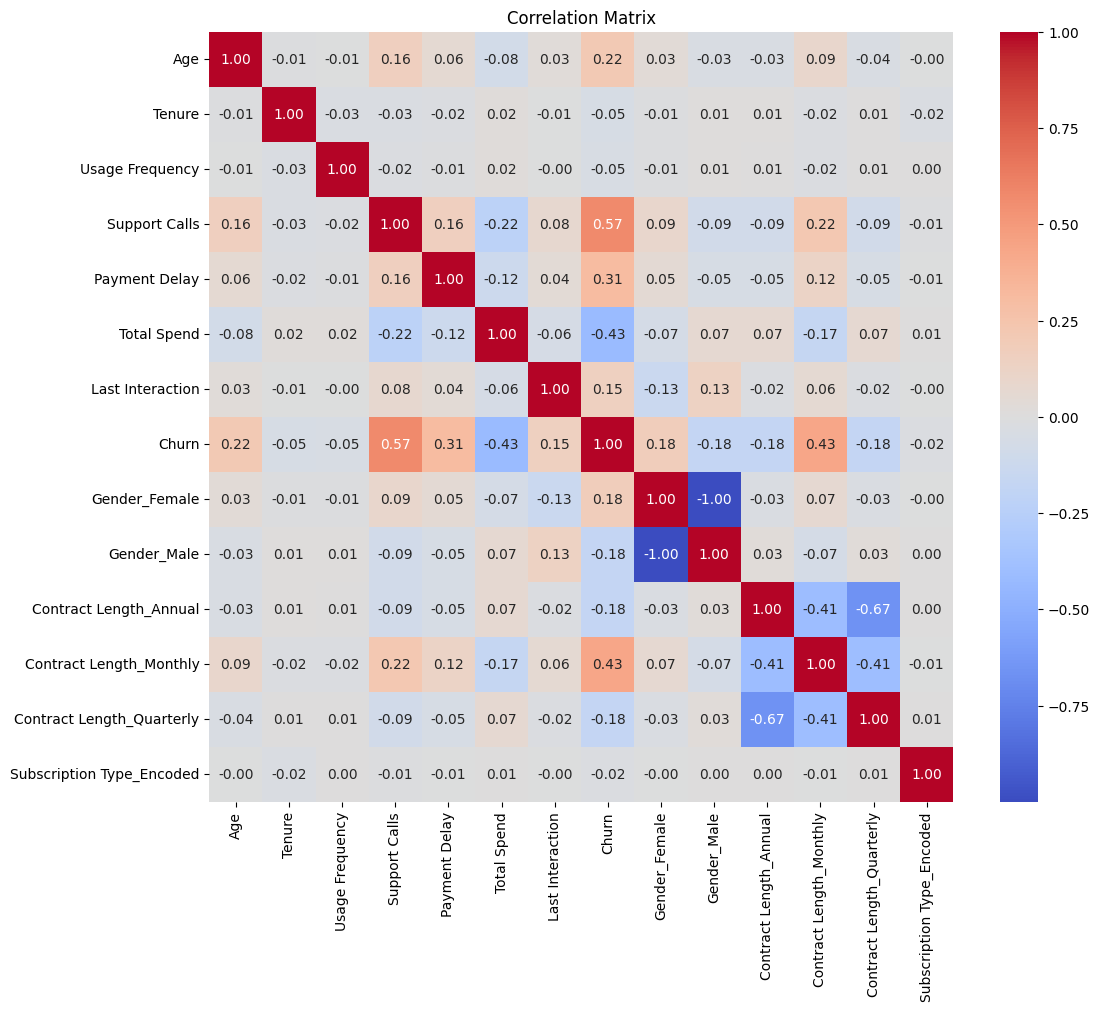

In [11]:
## Correlation matrix
plt.figure(figsize=(12,10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
dataset.dropna(inplace=True)

In [23]:
dataset.to_csv('/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Project/Data/customer_churn_dataset_prepared.csv', index=False)

In [21]:
## Feature selection Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = dataset.drop(columns=['Churn'])
y = dataset['Churn']

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)  

KeyboardInterrupt: 

In [ ]:
## Feature Selection Embedded methods

## Feature Extraction, ___ Do a PCA >> Reduce upto 3 components : Visuaize the datapoints based on the target variable -churn\not churn ___ Homework


